In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [2]:
PATH = Path('/home/jupyter/fastai/courses/dl2/data/pascal')
JPEG_PATH = PATH/'VOCdevkit'/'VOC2007'/'JPEGImages'

In [3]:
trn_j = json.load((PATH/'pascal_train2007.json').open())

In [4]:
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [8]:
cats = {o['id']:o['name'] for o in trn_j['categories']}
trn_fns = {o['id']:o['file_name'] for o in trn_j['images']}
trn_ids = [o['id'] for o in trn_j['images']]

In [12]:
list(JPEG_PATH.iterdir())[:5]

[PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/004088.jpg'),
 PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/003771.jpg'),
 PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/008495.jpg'),
 PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/004702.jpg'),
 PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/005115.jpg')]

In [17]:
im0_d = trn_j['images'][0]
im0_d['file_name'], im0_d['id']

('000012.jpg', 12)

In [18]:
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3] + bb[1] - 1, bb[2] + bb[0] - 1])
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [36]:
trn_anno = collections.defaultdict(list)
for o in trn_j['annotations']:
    if not o['ignore']:
        trn_anno[o['image_id']].append((hw_bb(o['bbox']), o['category_id']))

In [38]:
len(trn_anno), len(cats)

(2501, 20)

### Look at some example from the data

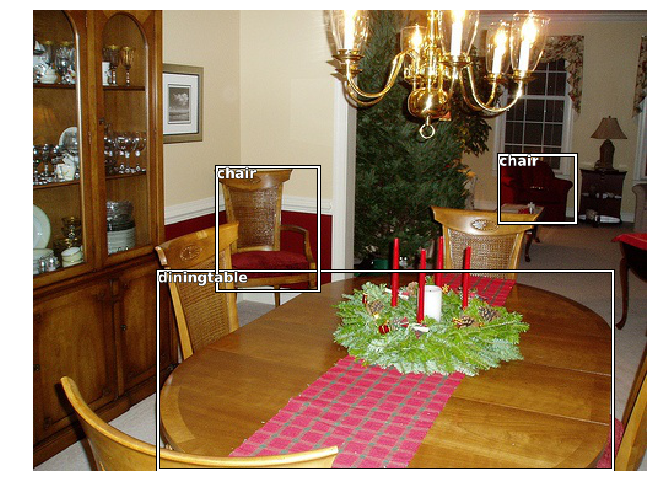

In [78]:
i = trn_ids[130]
img = open_image(JPEG_PATH/trn_fns[i])
bboxes = [o[0] for o in trn_anno[i]]
classes = [cats[o[1]] for o in trn_anno[i]]
labels = range(len(classes))
labels, classes
bbox = ImageBBox.create(*img.size, bboxes=bboxes, classes=classes, labels=labels)
img.show(y=bbox, figsize=(11, 11))

# Largest Item Classifier

In [45]:
fns, clss = zip(*((filenames[i], annot['class']) for i, annot in biggest_bb.items()))
df = pd.DataFrame.from_dict({'filename': fns, 'class': clss})

In [46]:
df.head()

,filename,class
0,/home/jupyter/fastai/courses/dl2/data/pascal/V...,car
1,/home/jupyter/fastai/courses/dl2/data/pascal/V...,horse
2,/home/jupyter/fastai/courses/dl2/data/pascal/V...,person
3,/home/jupyter/fastai/courses/dl2/data/pascal/V...,car
4,/home/jupyter/fastai/courses/dl2/data/pascal/V...,aeroplane


In [40]:
data = ImageDataBunch.from_lists(path=PATH, fnames=fns, labels=clss, size=224)

In [54]:
ImageList.from_df(df=df, path='.')

FileNotFoundError: [Errno 2] No such file or directory: './/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/000012.jpg'

In [53]:
open_image('.//home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/000012.jpg')

FileNotFoundError: [Errno 2] No such file or directory: './/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/000012.jpg'

In [51]:
filenames

{12: PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/000012.jpg'),
 17: PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/000017.jpg'),
 23: PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/000023.jpg'),
 26: PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/000026.jpg'),
 32: PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/000032.jpg'),
 33: PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/000033.jpg'),
 34: PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/000034.jpg'),
 35: PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/000035.jpg'),
 36: PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOCdevkit/VOC2007/JPEGImages/000036.jpg'),
 42: PosixPath('/home/jupyter/fastai/courses/dl2/data/pascal/VOC